# **Trabalho Tópicos Avançados em Gestão de Dados**

**Base de dados escolhida:** Coffee Quality Data
- Disponível em: https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi

**Coluna alvo:** Total Cup Points

**Objetivo do modelo:** Predizer se o café é de qualidade ou não, baseando-se em indicadores como acidez, doçura, altitude, sabor, corpo, entre outros.

**Justificativa da escolha:** A justificativa por trás da escolha é simplesmente ser apreciador de café.

**Colunas escolhidas do Dataset:**
*   Country of origem: país de origem do grão de café
*   Companny: nome da empresa que detém os grãos de café
*   Altitude: altitude em que o grão de café foi plantado
*   Region: região do país que o país foi plantado
*   Variety: tipo de grão
*   Processing Method: método de processamento do grão de café
*   Aroma: refere-se ao cheiro ou fragrância do café.
*   Flavor: refere-se ao sabor do café, que é avaliado com base no em doçura, amargor, acidez e outras notas de sabor.
*   Aftertaste: refere-se ao gosto persistente que fica na boca após consumir o café.
*   Acidity: acidez do café refere-se ao brilho ou vivacidade do sabor.
*   Body: o corpo do café refere-se à espessura ou viscosidade do café na boca.
*   Sweetness: pode ser descrito como caramelo, frutado ou floral e é uma qualidade desejável no café.
*   Balance: equilíbrio refere-se a quão bem os diferentes componentes do sabor do café funcionam juntos.
*   Uniformity: a uniformidade refere-se à consistência do café de xícara para xícara.
*   Total Cup Points: É a nota do café, que nada mais é do que o somatório de alguns desses features fornecidos acima.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/df_arabica.xlsx')
df = df.iloc[: , 1:] #remove primeira coluna.
df.head()

,Country of Origin,Company,Altitude,Region,Owner,Variety,Processing Method,Aroma,Flavor,Aftertaste,...,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects
0,Colombia,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Coffee Quality Union,Castillo,Double Anaerobic Washed,858,85,842,...,100,100,858,0,8933,118,0,0,green,3
1,Taiwan,Taiwan Coffee Laboratory,1200,Chiayi,Taiwan Coffee Laboratory å°ç£å’–å•¡ç ”ç©¶å®¤,Gesha,Washed / Wet,85,85,792,...,100,100,85,0,8758,105,0,0,blue-green,0
2,Laos,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,Taiwan Coffee Laboratory å°ç£å’–å•¡ç ”ç©¶å®¤,Java,Semi Washed,833,842,808,...,100,100,833,0,8742,104,0,0,yellowish,2
3,Costa Rica,Coffee Quality Union,1900,"Los Santos,Tarrazu",Coffee Quality Union,Gesha,Washed / Wet,808,817,817,...,100,100,825,0,8717,118,0,0,green,0
4,Colombia,Coffee Quality Union,1850-2100,"Popayan,Cauca",Coffee Quality Union,Red Bourbon,"Honey,Mossto",833,833,808,...,100,100,825,0,8708,116,0,2,yellow-green,2


Estatísticas Descritivas

In [ ]:
df.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000
mean,664.280193,642.299517,657.149758,642.289855,651.048309,628.318841,107.729469,100.0,100.0,627.028986,0.0,6773.917874,96.265700,0.135266,0.690821,2.251208
std,252.782263,273.695187,245.725243,269.853040,256.191709,275.915273,78.511976,0.0,0.0,279.453817,0.0,3097.021615,33.369685,0.592070,1.686918,2.950183
min,65.000000,75.000000,70.000000,70.000000,70.000000,70.000000,100.000000,100.0,100.0,70.000000,0.0,780.000000,0.000000,0.000000,0.000000,0.000000
25%,733.000000,725.000000,725.000000,733.000000,733.000000,725.000000,100.000000,100.0,100.0,717.000000,0.0,8062.500000,97.000000,0.000000,0.000000,0.000000
50%,767.000000,767.000000,758.000000,767.000000,758.000000,767.000000,100.000000,100.0,100.0,758.000000,0.0,8325.000000,106.000000,0.000000,0.000000,1.000000
75%,783.000000,783.000000,775.000000,783.000000,775.000000,775.000000,100.000000,100.0,100.0,783.000000,0.0,8458.000000,115.000000,0.000000,1.000000,3.000000
max,858.000000,842.000000,842.000000,858.000000,825.000000,842.000000,933.000000,100.0,100.0,858.000000,0.0,8933.000000,135.000000,5.000000,12.000000,16.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country of Origin     207 non-null    object
 1   Company               207 non-null    object
 2   Altitude              206 non-null    object
 3   Region                205 non-null    object
 4   Owner                 207 non-null    object
 5   Variety               201 non-null    object
 6   Processing Method     202 non-null    object
 7   Aroma                 207 non-null    int64 
 8   Flavor                207 non-null    int64 
 9   Aftertaste            207 non-null    int64 
 10  Acidity               207 non-null    int64 
 11  Body                  207 non-null    int64 
 12  Balance               207 non-null    int64 
 13  Uniformity            207 non-null    int64 
 14  Clean Cup             207 non-null    int64 
 15  Sweetness             207 non-null    in

In [ ]:
colunas_irrelevantes = ['Category Two Defects','Category One Defects','Clean Cup','Quakers','Company','Owner','Overall','Sweetness','Defects']
df = df.drop(columns = colunas_irrelevantes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country of Origin    207 non-null    object
 1   Altitude             206 non-null    object
 2   Region               205 non-null    object
 3   Variety              201 non-null    object
 4   Processing Method    202 non-null    object
 5   Aroma                207 non-null    int64 
 6   Flavor               207 non-null    int64 
 7   Aftertaste           207 non-null    int64 
 8   Acidity              207 non-null    int64 
 9   Body                 207 non-null    int64 
 10  Balance              207 non-null    int64 
 11  Uniformity           207 non-null    int64 
 12  Total Cup Points     207 non-null    int64 
 13  Moisture Percentage  207 non-null    int64 
 14  Color                207 non-null    object
dtypes: int64(9), object(6)
memory usage: 24.4+ KB


Gráfico de barras - País de origem

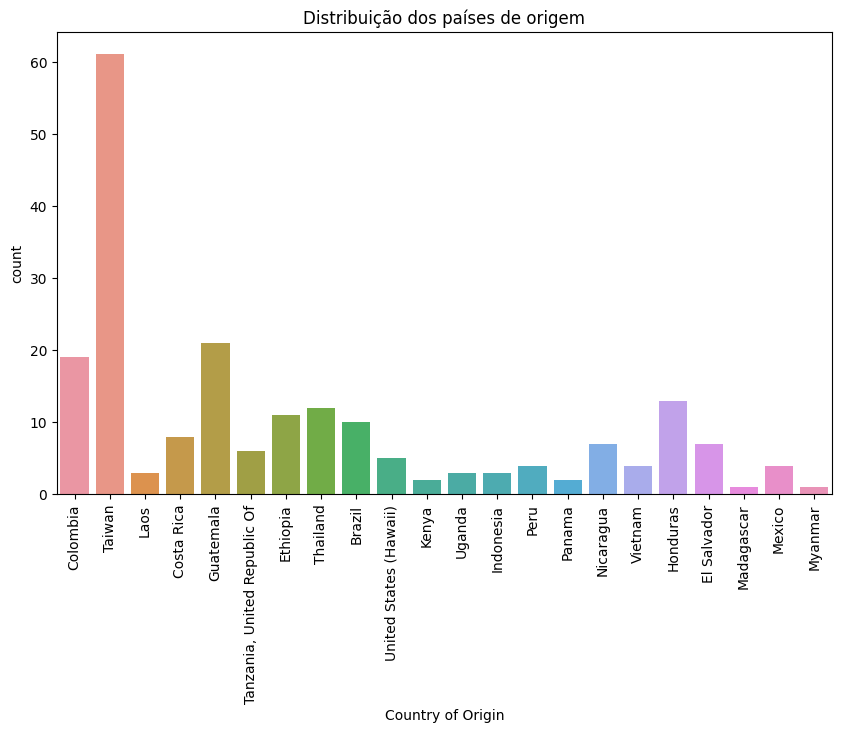

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Country of Origin', data=df)
plt.title('Distribuição dos países de origem')
plt.xticks(rotation=90)
plt.show()

Gráfico de Distribuição - Variedades

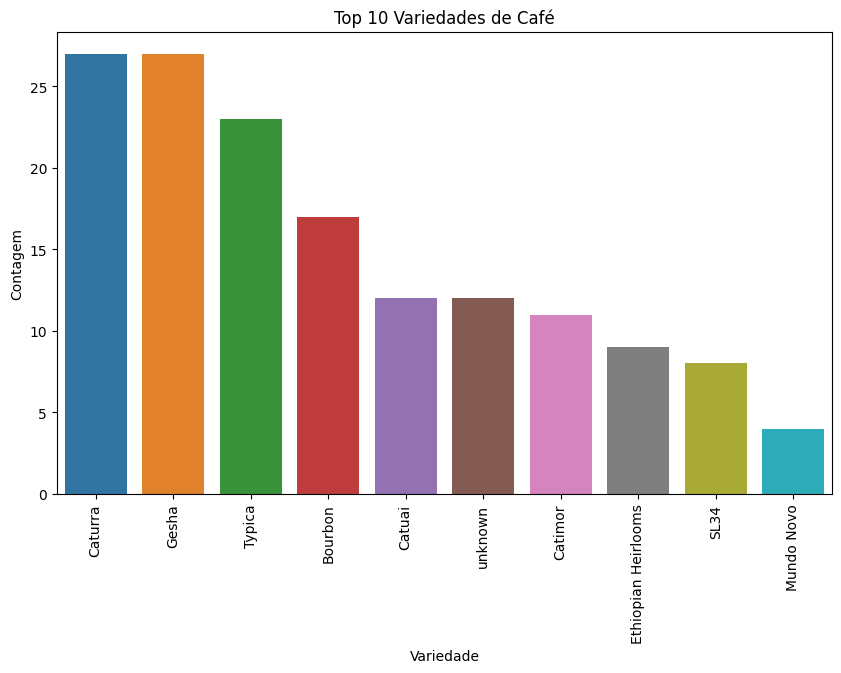

In [ ]:
variedade_contagem = df['Variety'].value_counts().head(10)

# Gráfico de barras - Variedade
plt.figure(figsize=(10, 6))
sns.barplot(x=variedade_contagem.index, y=variedade_contagem.values)
plt.title('Top 10 Variedades de Café')
plt.xlabel('Variedade')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.show()


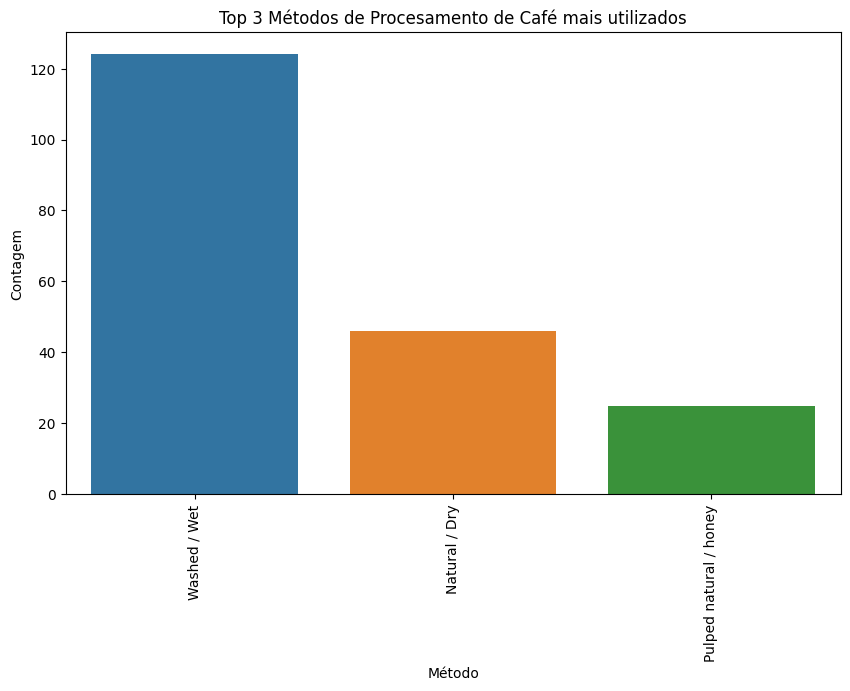

In [ ]:
# Gráfico de barras - Método de processamento
metodo_contagem = df['Processing Method'].value_counts().head(3)


plt.figure(figsize=(10, 6))
sns.barplot(x=metodo_contagem.index, y=metodo_contagem.values)
plt.title('Top 3 Métodos de Procesamento de Café mais utilizados')
plt.xlabel('Método')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.show()

array([[<Axes: title={'center': 'Flavor'}>,
        <Axes: title={'center': 'Aftertaste'}>,
        <Axes: title={'center': 'Acidity'}>],
       [<Axes: title={'center': 'Body'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'Uniformity'}>],
       [<Axes: title={'center': 'Total Cup Points'}>, <Axes: >, <Axes: >]],
      dtype=object)

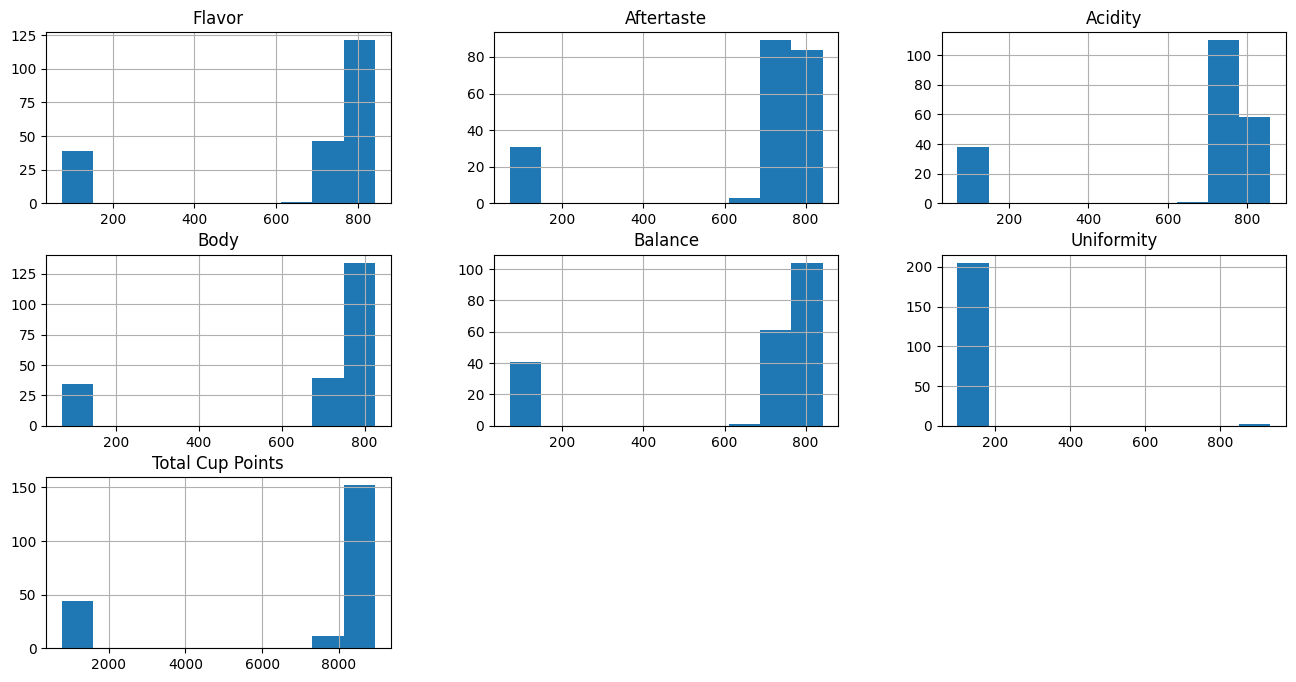

In [ ]:
df.hist(column=['Flavor','Aftertaste','Acidity','Body','Balance','Uniformity', 'Total Cup Points' ],   figsize=(16,8))

In [ ]:
corr_proc = df.corr()
corr_proc.style.background_gradient(cmap='coolwarm')

<ipython-input-22-2b818f1bab83>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_proc = df.corr()


,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Total Cup Points,Moisture Percentage
Aroma,1.000000,0.168007,0.094092,0.091850,-0.032916,-0.041881,0.046794,-0.013597,0.046159
Flavor,0.168007,1.000000,-0.034334,0.030446,-0.010141,0.013994,0.050910,-0.093587,-0.076054
Aftertaste,0.094092,-0.034334,1.000000,0.014256,0.063806,0.064545,0.044225,0.021604,-0.041455
Acidity,0.091850,0.030446,0.014256,1.000000,-0.035137,0.082254,0.051639,0.012225,-0.018166
Body,-0.032916,-0.010141,0.063806,-0.035137,1.000000,0.054251,0.047863,-0.028084,0.087079
Balance,-0.041881,0.013994,0.064545,0.082254,0.054251,1.000000,-0.075767,-0.095531,0.031562
Uniformity,0.046794,0.050910,0.044225,0.051639,0.047863,-0.075767,1.000000,0.051186,0.021752
Total Cup Points,-0.013597,-0.093587,0.021604,0.012225,-0.028084,-0.095531,0.051186,1.000000,-0.047739
Moisture Percentage,0.046159,-0.076054,-0.041455,-0.018166,0.087079,0.031562,0.021752,-0.047739,1.000000


<Axes: xlabel='Total Cup Points', ylabel='Aroma'>

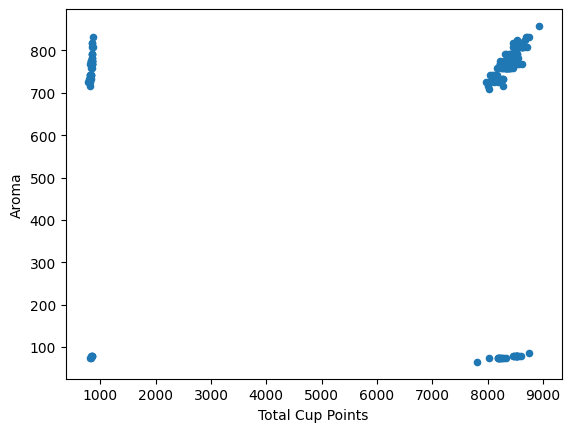

In [ ]:
df.plot.scatter(x='Total Cup Points', y='Aroma')